**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/machine-learning-competitions).**

---


# Introduction

Name: Dehan Ammaralda Handiana

This notebook intended for explore the data and try to use other model

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Telyu_ML_Class'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Telyu_ML_Class/Week 1/test.csv
/content/drive/MyDrive/Telyu_ML_Class/Week 1/sample_submission.csv
/content/drive/MyDrive/Telyu_ML_Class/Week 1/data_description.txt
/content/drive/MyDrive/Telyu_ML_Class/Week 1/train.csv
/content/drive/MyDrive/Telyu_ML_Class/Week 1/New Text Document.txt
/content/drive/MyDrive/Telyu_ML_Class/Week 1/submission.csv
/content/drive/MyDrive/Telyu_ML_Class/Week 1/house-prices.ipynb
/content/drive/MyDrive/Telyu_ML_Class/Week 1/house-prices-advanced-regression-techniques.zip


Data inputted. Now, read it into csv

In [3]:
home_data = pd.read_csv('/content/drive/MyDrive/Telyu_ML_Class/Week 1/train.csv')
home_test = pd.read_csv('/content/drive/MyDrive/Telyu_ML_Class/Week 1/test.csv')

print(home_data.describe())
print(home_data.head())
print(home_data.columns)

                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]
   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal 

In [4]:
# Find columns that have missing value in home_data (train)

missing = home_data.isna()
percent = (missing.sum()/missing.count()*100).sort_values(ascending=False)
missing_columns = percent[percent > 0].index.tolist() # Any
print('Columns which have missing values: \n{0}'.format(missing_columns))

Columns which have missing values: 
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical']


In [5]:
# Duplicate value in home_data (train)

duplicates = home_data.duplicated().sum()
print('Duplicates in train data: {0}'.format(duplicates))

Duplicates in train data: 0


In [6]:
# Drop columns that have missing value

home_data.drop(missing_columns, axis=1, inplace=True)
home_test.drop(missing_columns, axis=1, inplace=True)

Since model using numerical value, it is better to know which columns that have numerical attribute. Non - numerical columns still can be use to train the model if the string is hot encode

In [7]:
# Separate columns between numerical and object

s = (home_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Object Columns")
print(object_cols)
print(len(object_cols))

numerical_cols = []
for col in home_data.columns:
    if (col not in object_cols):
        numerical_cols.append(col)
        
print("Numerical Columns")
print(numerical_cols)
print(len(numerical_cols))

Object Columns
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
27
Numerical Columns
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
35


**Explarotory**

All columns that have a value is plotted for better understanding

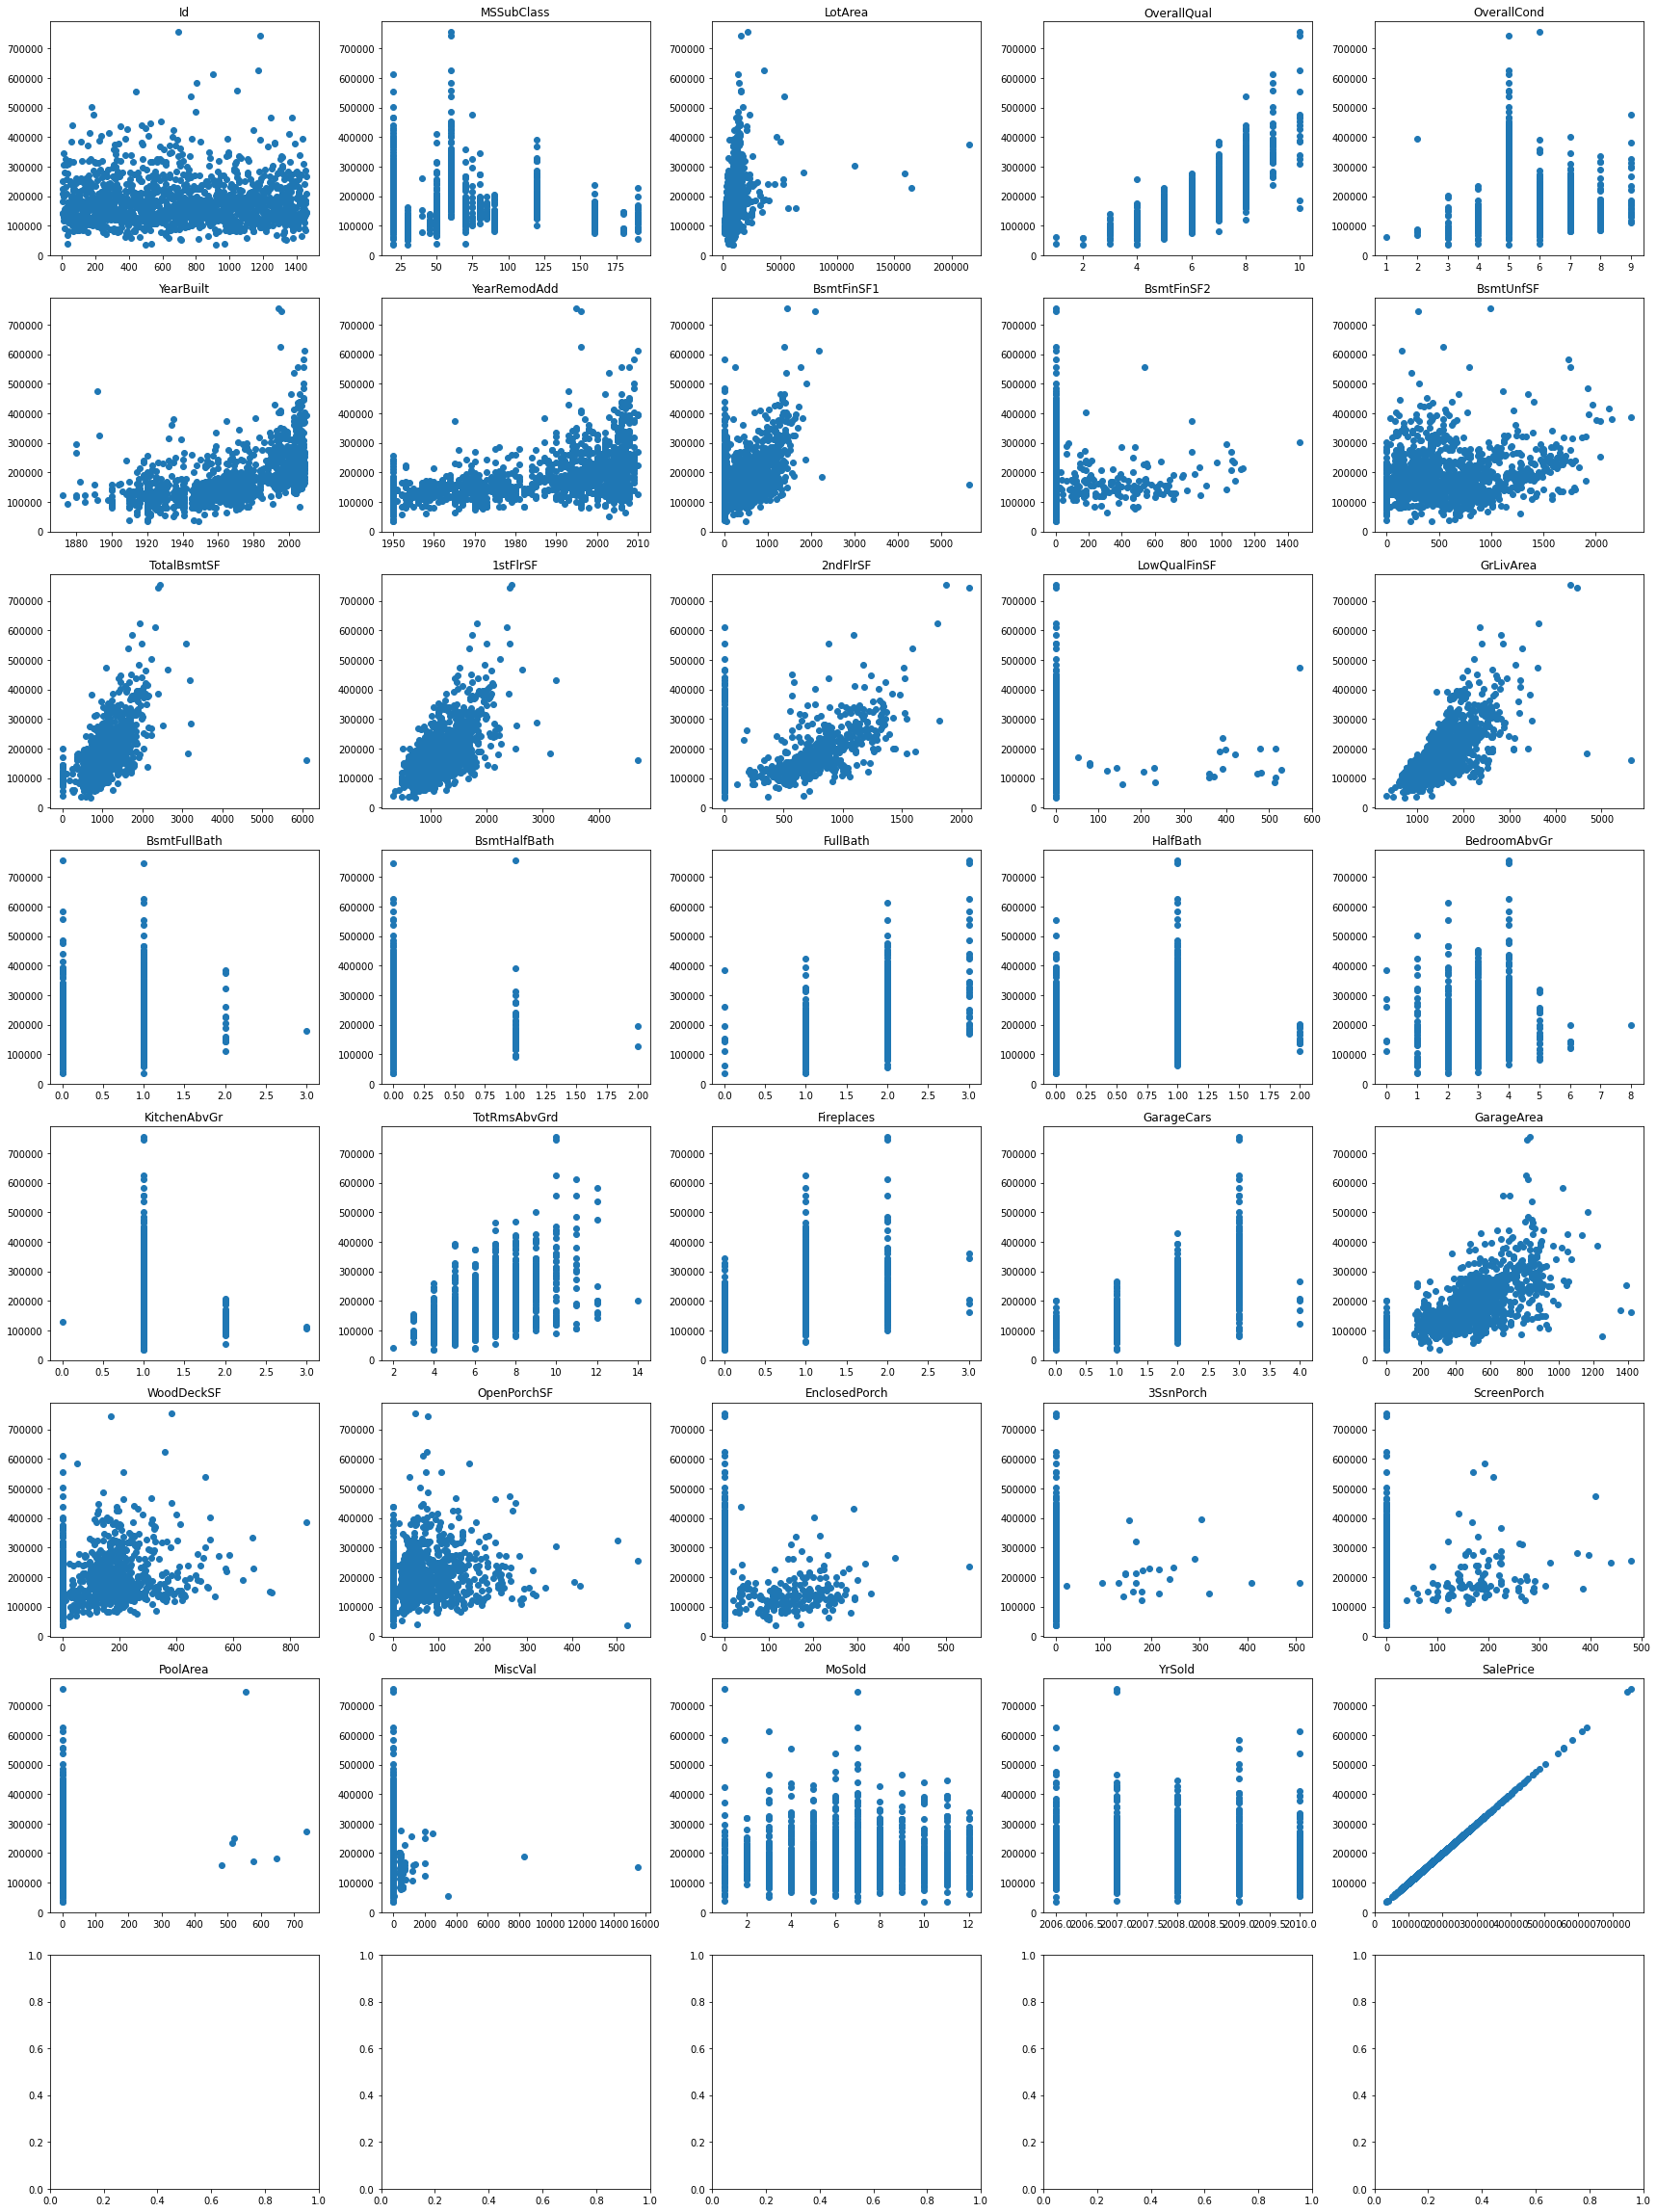

In [8]:
import matplotlib.pyplot as plt

# Plot all columns

fig, axes = plt.subplots(8,5)
m = 0
for i, column in enumerate(numerical_cols):
    k, l = divmod(m,5)
    ax = axes[k,l]
    plt.sca(ax)
    plt.scatter(home_data[column],home_data.SalePrice)
    plt.title(column)
    m = m + 1
fig.set_size_inches(24,32)
fig.tight_layout()

From here we can see that there are columns that can be used as feature to train the model

**Next,**

RandomForestRegressor model has several parameter. I tried to use RandomizedSearchCV to search which parameter that may provide the best result

In [9]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# y as label
y = home_data.SalePrice

# Choose which features that can help model more accurate
features = ['OverallQual', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF',
            'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)




rf = RandomForestRegressor()

# Search the best parameter with 100 iteration and 3-fold cross validation to evaluate the result
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)
rf_random.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Currently, this is the best parameter that can be use to increase accuracy

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [ ]:
# Define a random forest model
rf_model = RandomForestRegressor(n_estimators = 1800, min_samples_split = 5, min_samples_leaf = 1, 
                                 max_features = 'sqrt', max_depth = 10, bootstrap = False, random_state = 1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

In [ ]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(n_estimators = 1800, min_samples_split = 5, min_samples_leaf = 1, 
                                 max_features = 'sqrt', max_depth = 10, bootstrap = False)


# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X, y)

Now, read the file of "test" data, and apply your model to make predictions.

In [ ]:
from sklearn.metrics import accuracy_score

y = home_data.SalePrice
features = ['OverallQual', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF',
            'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']


# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = home_test[features]
test_X.fillna(0, inplace=True)

In [ ]:
# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

# Generate a submission

Run the code cell below to generate a CSV file with your predictions that you can use to submit to the competition.

In [ ]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': home_test.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)
